# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

list_ctw = [];  #list of city weather

print('Beginning Data Retrieval')
print('--------------------------------------')
try:    
    for index, city in enumerate(cities, start = 1) :
        response = requests.get(query_url + city)

        print(f"Processing Record ({index}) {city} ")
        if(response.status_code == 200):
            response_json = response.json()
            list_ctw.append({'city': response_json['name'],
                               'cloudiness': response_json['clouds']['all'],
                               'country': response_json['sys']['country'],
                               'date': response_json['dt'],
                               'humidity': response_json['main']['humidity'],
                               'lat': response_json['coord']['lat'],
                               'lng': response_json['coord']['lon'],
                               'max_temp' : response_json['main']['temp_max'],
                               'wind_speed': response_json['wind']['speed']               
                              })
        else:
            print("City not found. Skipping...")
            
    print('Data Retrieval is COMPLETED')
    df_ctf = pd.DataFrame(list_ctw)
except:
    print("An error has occured while on an api call. You may try the run the code again!")


Beginning Data Retrieval
--------------------------------------
Processing Record (1) khandyga 
Processing Record (2) inuvik 
Processing Record (3) ponta do sol 
Processing Record (4) busselton 
Processing Record (5) puerto ayora 
Processing Record (6) xinzhou 
Processing Record (7) sharlyk 
Processing Record (8) avarua 
Processing Record (9) marcona 
City not found. Skipping...
Processing Record (10) ushuaia 
Processing Record (11) bredasdorp 
Processing Record (12) zarinsk 
Processing Record (13) ixtapa 
Processing Record (14) hermanus 
Processing Record (15) verkhovazhye 
Processing Record (16) bluff 
Processing Record (17) la union 
Processing Record (18) vila 
Processing Record (19) chokurdakh 
Processing Record (20) mustasaari 
Processing Record (21) hobart 
Processing Record (22) vaini 
Processing Record (23) hilo 
Processing Record (24) qaanaaq 
Processing Record (25) mar del plata 
Processing Record (26) barrow 
Processing Record (27) rikitea 
Processing Record (28) yellowknif

Processing Record (217) dera din panah 
City not found. Skipping...
Processing Record (218) ilulissat 
Processing Record (219) narsaq 
Processing Record (220) strezhevoy 
Processing Record (221) tiksi 
Processing Record (222) tezu 
Processing Record (223) bacuit 
City not found. Skipping...
Processing Record (224) vao 
Processing Record (225) bouca 
Processing Record (226) esperance 
Processing Record (227) nova prata 
Processing Record (228) sagna 
Processing Record (229) ahipara 
Processing Record (230) upernavik 
Processing Record (231) cabra 
Processing Record (232) thompson 
Processing Record (233) port hedland 
Processing Record (234) vieste 
Processing Record (235) richards bay 
Processing Record (236) swan hill 
Processing Record (237) sovetskiy 
Processing Record (238) bima 
Processing Record (239) yulara 
Processing Record (240) japura 
Processing Record (241) puerto colombia 
Processing Record (242) sarab 
Processing Record (243) verkh-usugli 
Processing Record (244) ancud 


Processing Record (439) vysokogornyy 
Processing Record (440) bargal 
City not found. Skipping...
Processing Record (441) kabanjahe 
Processing Record (442) gaoyou 
Processing Record (443) lorengau 
Processing Record (444) buraydah 
Processing Record (445) byron bay 
Processing Record (446) ardabil 
Processing Record (447) chambersburg 
Processing Record (448) yangambi 
Processing Record (449) cururupu 
Processing Record (450) amroha 
Processing Record (451) port moresby 
Processing Record (452) sorland 
Processing Record (453) xalpatlahuac 
Processing Record (454) burica 
City not found. Skipping...
Processing Record (455) whitehorse 
Processing Record (456) mount isa 
Processing Record (457) elko 
Processing Record (458) namtsy 
Processing Record (459) bongouanou 
Processing Record (460) siirt 
Processing Record (461) tura 
Processing Record (462) susehri 
Processing Record (463) sistranda 
Processing Record (464) yining 
Processing Record (465) tamboril 
Processing Record (466) pira

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
df_ctf.to_csv(output_data_file, encoding='utf-8', index=False)
df_ctf.date = pd.to_datetime(df_ctf.date, unit='s')
df_ctf.head()

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Khandyga,35,RU,2019-11-25 18:30:57,95,62.65,135.58,-42.95,1.12
1,Inuvik,90,CA,2019-11-25 18:30:58,92,68.36,-133.71,6.80,3.36
2,Ponta do Sol,85,BR,2019-11-25 18:30:58,70,-20.63,-46.00,76.35,2.68
3,Busselton,21,AU,2019-11-25 18:30:58,44,-33.64,115.35,59.00,11.72
4,Puerto Ayora,20,EC,2019-11-25 18:30:58,57,-0.74,-90.35,80.60,17.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

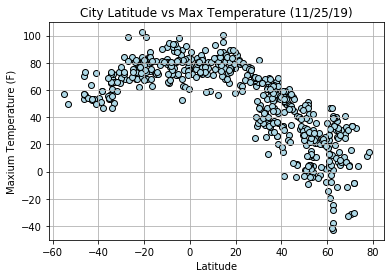

In [31]:
current_date = datetime.date.today().strftime("%m/%d/%y")
chart_title = f'City Latitude vs Max Temperature ({current_date})'
fig, ax = plt.subplots()
ax.scatter(df_ctf.lat,df_ctf.max_temp,c='LightBlue',edgecolors="Black")
ax.set_title(chart_title)        
ax.set_xlabel('Latitude')
ax.set_ylabel('Maxium Temperature (F)')
ax.axes.grid()
fig.savefig('output_data\latitude_vs_temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

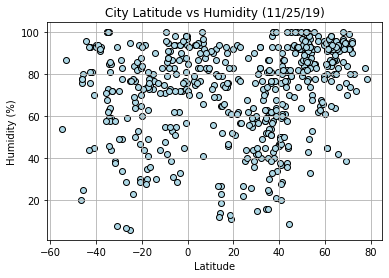

In [32]:
chart_title = f'City Latitude vs Humidity ({current_date})'
fig, ax = plt.subplots()
ax.scatter(df_ctf.lat,df_ctf.humidity,c='LightBlue',edgecolors="Black")
ax.set_title(chart_title)        
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.axes.grid()
fig.savefig('output_data\latitude_vs_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

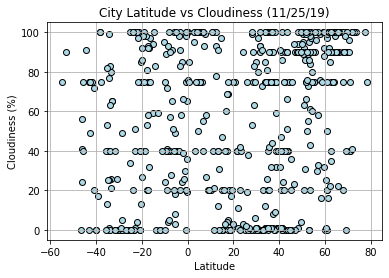

In [33]:
chart_title = f'City Latitude vs Cloudiness ({current_date})'
fig, ax = plt.subplots()
ax.scatter(df_ctf.lat,df_ctf.cloudiness,c='LightBlue',edgecolors="Black")
ax.set_title(chart_title)        
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.axes.grid()
fig.savefig('output_data\latitude_vs_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

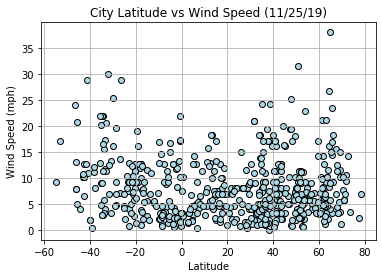

In [34]:
chart_title = f'City Latitude vs Wind Speed ({current_date})'
fig, ax = plt.subplots()
ax.scatter(df_ctf.lat,df_ctf.wind_speed,c='LightBlue',edgecolors="Black")
ax.set_title(chart_title)        
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.axes.grid()
fig.savefig('output_data\latitude_vs_wind.png')
plt.show()

# Three Observable Trends

1. Cities the are approaching the equator (at near 0 latitude), seem to be warmer.  Cities that are farther away from the 
   equator are cooler
2. There is a gradual increase of the wind speed as the distance of the city to the equator increases.
3. There is no clear variance of the city's cloudiness in relation to it's latitude. If there is,  it seems to be minimal.